The Voigt-Hjerting is defined as

$ H(x,a) = \frac{a}{\pi} \int_{-\infty}^{\infty} \frac{e^{-y^2}}{(x-y)^2 + a^2} dy.$

In exojax, hjert is the Voigt-Hjerting function.

In [1]:
from exojax.spec import hjert
hjert(1.0,1.0)

DeviceArray(0.3047442, dtype=float32)

We can differentiate the Voigt-Hjerting function by $x$. $\partial_x H(x,a)$ is given by

In [2]:
from jax import grad
dhjert_dx=grad(hjert,argnums=0)
dhjert_dx(1.0,1.0)

DeviceArray(-0.19305044, dtype=float32, weak_type=True)

hjert is compatible to JAX. So, when you want to use array as input, you need to wrap it by jax.vmap. 

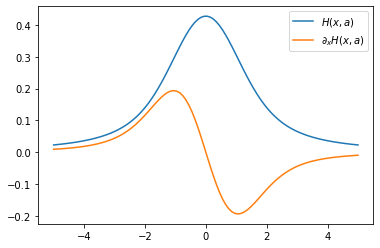

In [3]:
import jax.numpy as jnp
from jax import vmap
import matplotlib.pyplot as plt

#input vector
x=jnp.linspace(-5,5,100)

#vectorized hjert H(x,a)
vhjert=vmap(hjert,(0,None),0)

#vectroized dH(x,a)/dx
vdhjert_dx=vmap(dhjert_dx,(0,None),0)

plt.plot(x, vhjert(x,1.0),label="$H(x,a)$")
plt.plot(x, vdhjert_dx(x,1.0),label="$\\partial_x H(x,a)$")
plt.legend()